In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Run preprocessing file
%run '../preprocessing/cleaning.ipynb'
data.head()

/var/folders/zs/m6739hc50mq3f4g25bdk88m80000gn/T/ipykernel_6893/4202787016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family_size'][i] = 1 + data['Kids'][i]
/var/folders/zs/m6739hc50mq3f4g25bdk88m80000gn/T/ipykernel_6893/4202787016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family_size'][i] = 2 + data['Kids'][i]


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Kids,Family_size,Age,Days_is_client,ActiveDays,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,...,0,1,57,972,914,1617,22,73.5,13.6,1
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,...,2,3,60,126,88,27,4,6.8,50.0,0
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,...,0,2,49,473,447,776,20,38.8,5.0,0
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,...,1,3,30,66,40,53,6,8.8,33.3,0
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,...,1,3,33,322,228,422,14,30.1,35.7,0


In [7]:
clust = data[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()

for i in clust.columns:
    clust[i] = StandardScaler().fit_transform(np.array(clust[[i]]))
    print(clust)

      AverageCheck  Days_is_client  NumAllPurchases
0         1.209014             972               22
1        -1.024965             126                4
2         0.046809             473               20
3        -0.957979              66                6
4        -0.244580             322               14
...            ...             ...              ...
2235      1.553991             542               16
2236     -0.261326              62               15
2237      1.054946             316               18
2238      0.090350             317               21
2239     -0.532619             783                8

[2228 rows x 3 columns]
      AverageCheck  Days_is_client  NumAllPurchases
0         1.209014        1.975356               22
1        -1.024965       -1.669784                4
2         0.046809       -0.174674               20
3        -0.957979       -1.928305                6
4        -0.244580       -0.825284               14
...            ...             ...     

/var/folders/zs/m6739hc50mq3f4g25bdk88m80000gn/T/ipykernel_6893/3659851933.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('''Optimal number


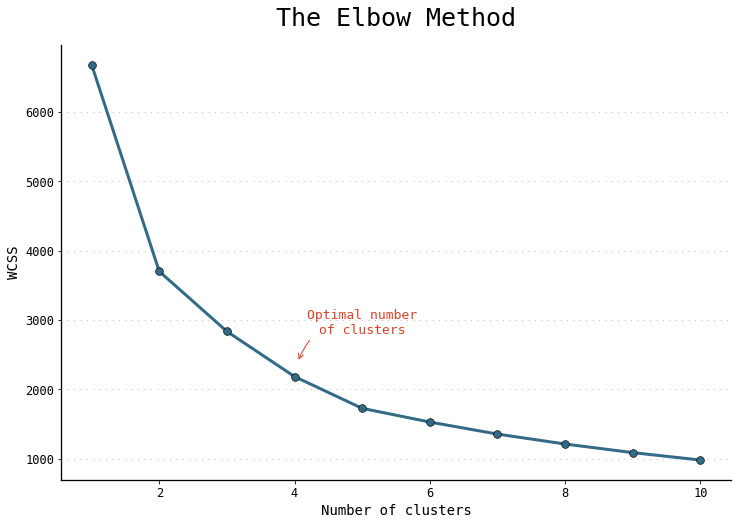

In [8]:
# Elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(clust)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 14, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()